442 662 3 1
[[ 44.  14.  21.   7. -14.]
 [ 52.   7.  21.  14.  -7.]
 [ 41.   0.   7.   7.   0.]
 [ 48.   0.   0.   0.   0.]
 [ 48.   0.   0.   0.  -6.]]
[[164 -12   7   7   0]
 [227  44  14  21   7]
 [239  52   7  21  14]
 [253  41   0   7   7]
 [260  48   0   0   0]]
[[ -44.  -14.   48.  151.   24.]
 [ -21.   55.   12.   22.   -5.]
 [  60.   54.  -64.  -46.   11.]
 [ 129.    1. -109.  -26.   67.]
 [  97.  -39.  -94.  -38.   70.]]
[[  55   12   22   -5 -337]
 [  54  -64  -46   11 -291]
 [   1 -109  -26   67 -258]
 [ -39  -94  -38   70 -214]
 [ -56  -54  -47   44 -134]]


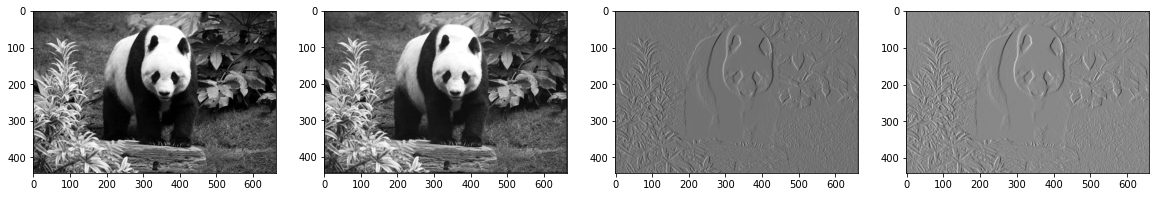

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

image = cv2.imread('../images/panda.png')
image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

def convolution2d(image, kernel, bias=0):
    m, n = kernel.shape
    if (m == n):
        y, x = image.shape
        y = y - m + 1
        x = x - m + 1
        new_image = np.zeros((y,x))
        for i in range(y):
            for j in range(x):
                new_image[i][j] = np.sum(image[i:i+m, j:j+m]*kernel) + bias
    return new_image

def convolve2d_copied(image, kernel):
    """
    This function which takes an image and a kernel and returns the convolution of them.
    :param image: a numpy array of size [image_height, image_width].
    :param kernel: a numpy array of size [kernel_height, kernel_width].
    :return: a numpy array of size [image_height, image_width] (convolution output).
    """
    # Flip the kernel
    kernel = np.flipud(np.fliplr(kernel))
    # convolution output
    output = np.zeros_like(image)

    # Add zero padding to the input image
    image_padded = np.zeros((image.shape[0] + 2, image.shape[1] + 2))
    image_padded[1:-1, 1:-1] = image

    # Loop over every pixel of the image
    for x in range(image.shape[1]):
        for y in range(image.shape[0]):
            # element-wise multiplication of the kernel and the image
            output[y, x] = (kernel * image_padded[y: y+3, x: x+3]).sum()

    return output


def convolution(image, kernel, add_pad = True):
    K = kernel.shape[0]
    pad = K//2
    M, N = image.shape
    print(M, N, K, pad)
    image_result = np.zeros_like(image, dtype='int')
    
    # save padded image
    if add_pad:
        image_padded = np.zeros(((image.shape[0] + K - 1), (image.shape[1] + K - 1)), dtype='int')
        image_padded[pad:-pad,pad:-pad] = image
    else:
        M = M - K + 1
        N = N - K + 1
        image_padded = image
    
    for i in range(M):
        for j in range(N):
            sum = np.sum(image_padded[i:i+K, j:j+K]*kernel)
            image_result[i][j] = sum
                        
    return image_padded, image_result

kernel = np.array([[-1, 0, +1],
                  [-2, 0, +2],
                  [-1, 0, +1]])

#image = np.ones((600, 600))
image_padded, conv_image = convolution(image, kernel)
conv_image_2 = convolution2d(image, kernel)

print(conv_image_2[0:5, 0:5])
print(conv_image[0:5, 0:5])
print(conv_image_2[-5:, -5:])
print(conv_image[-5:, -5:])

f, (ax0,ax1,ax2,ax3) = plt.subplots(1, 4, figsize=(20,10))
ax0.imshow(image, cmap='gray')
ax1.imshow(image_padded, cmap='gray')
ax2.imshow(conv_image, cmap='gray')
ax3.imshow(conv_image_2, cmap='gray')